In [1]:
import pandas as pd
from datetime import datetime

# Time series / date functionality in Pandas
* Pandas was developed for financial modelling (Wes Mckinney, AQR Capital)
* Time series analysis therefore comprises an integral part of the package
* We're going to look at three different concepts in Pandas
    - 1) Timestamps
    - 2) Timedeltas
    - 3) Periods

## 1) Timestamp objects
* Pandas has inbuilt TimeStamp objects
* An array of TimeStamp objects are a DateTimeIndex
* The datatype of a TimeStamp object is datetime64
* There are two main methods of creating Timestamps or a DateTimeIndex:
    - 1) `pd.to_datetime()`
    - 2) `pd.date_range()`

#### `pd.to_datetime()`

- You can use a lot of different formats to convert a string into a Timestamp

In [2]:
pd.to_datetime('2019 july 23') 

Timestamp('2019-07-23 00:00:00')

In [3]:
pd.to_datetime('2019-07-23')

Timestamp('2019-07-23 00:00:00')

In [4]:
pd.to_datetime('2019.07.23')

Timestamp('2019-07-23 00:00:00')

In [5]:
type(pd.to_datetime('230719-00:10:00'))

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
pd.to_datetime('230719-00:10:00')

Timestamp('2019-07-23 00:10:00')

In [7]:
pd.to_datetime('19/07/2023')

Timestamp('2023-07-19 00:00:00')

In [8]:
pd.to_datetime('19/07/2023', utc=True).tz_convert('US/Eastern')   ##allows inclusion of timezone

Timestamp('2023-07-18 20:00:00-0400', tz='US/Eastern')

In [9]:
###when u include the date in a list, pandas can be run on the list

dates = ['19/07/2023', '20/07/2023']     
dates = pd.to_datetime(dates)
dates

DatetimeIndex(['2023-07-19', '2023-07-20'], dtype='datetime64[ns]', freq=None)

You could also pass a pd.Series or a pd.DataFrame into `pd.to_datetime()` if the values are convertable to a Timestamp.

#### `pd.date_range()`

What happens if you want to create a range of dates?
You can use `pd.date_range()` to create a DateTimeIndex (array of Timestamps):

In [10]:
date_range = pd.date_range('jan 1 2019', '31 dec 2019', freq = '12h')   ##freq of data time interval

In [11]:
date_range

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 12:00:00',
               '2019-01-02 00:00:00', '2019-01-02 12:00:00',
               '2019-01-03 00:00:00', '2019-01-03 12:00:00',
               '2019-01-04 00:00:00', '2019-01-04 12:00:00',
               '2019-01-05 00:00:00', '2019-01-05 12:00:00',
               ...
               '2019-12-26 12:00:00', '2019-12-27 00:00:00',
               '2019-12-27 12:00:00', '2019-12-28 00:00:00',
               '2019-12-28 12:00:00', '2019-12-29 00:00:00',
               '2019-12-29 12:00:00', '2019-12-30 00:00:00',
               '2019-12-30 12:00:00', '2019-12-31 00:00:00'],
              dtype='datetime64[ns]', length=729, freq='12H')

#### This is all nice and fine, but why do we care?

The reason we care for Timestamps in pandas is because they allow us to perform time related actions on the data.
Several things you can do with a timestamp:

- extract the hour
- extract the day
- extract the month
- extract the year
- Slice a DataFrame or Series if the DateTimeIndex is the Index of the DataFrame
- calculate time differences

In [12]:
first_day = date_range[0]

In [13]:
first_day.hour, first_day.day, first_day.year, first_day.month_name()

(0, 1, 2019, 'January')

How could that be useful?
Let us look at the data for this week and think about what we could do with this functionality:

- Extract weekdays from the Timestamp
- Extract the hour of the day from the Timestamp
- Create subsets of the data
- ...

In [16]:
df = pd.read_csv('../data/train.csv', index_col=0, parse_dates=True)  ##parse_date
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
df.index.resolution    ###to tell us the freq of the time, or interval btw each time

'hour'

In [18]:
df.loc['2011-01-01 01:00':'2011-01-01 04:00']   ###to locate data for a particular date(time range

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
##time slicing
##between time means between about a period
###locate time from 2011-01-01':'2011-01-02' and append 2011-01-03  between 12-1
df.loc['2011-01-01':'2011-01-02'].append(df.loc['2011-01-03'].between_time('00:00', '01:00'))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8


#### `df.between_time()`

In [20]:
df.between_time('00:00:00', '01:00:00')   ##filters from df for the specified time
####the function only works, if ur index is not specified as datatime

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-02 00:00:00,1,0,0,2,18.86,22.725,88,19.9995,4,13,17
2011-01-02 01:00:00,1,0,0,2,18.04,21.970,94,16.9979,1,16,17
2011-01-03 00:00:00,1,0,1,1,9.02,9.850,44,23.9994,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-17 01:00:00,4,0,1,2,15.58,19.695,87,7.0015,1,14,15
2012-12-18 00:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,18,18
2012-12-18 01:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,15,15


In [23]:
df.index[0]

Timestamp('2011-01-01 00:00:00')

In [24]:
df.index[0].is_year_start

True

## 2) Timedelta objects

Pandas has inbuilt Timedelta objects
* An array of Timedelta objects is a TimedeltaIndex
* The datatype of a TimeStamp object is timedelta64
* There are three methods of creating Timedeltas or a TimedeltaIndex:
    - 1) `pd.to_timedelta()`
    - 2) `pd.timedelta_range()`
    - 3) Subtract two pd.Timestamp objects

In [25]:
date_range[0]

Timestamp('2019-01-01 00:00:00', freq='12H')

In [26]:
delta = date_range[1] - date_range[0]
delta

Timedelta('0 days 12:00:00')

In [27]:
delta.seconds

43200

In [28]:
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=10886)

In [29]:
df.index.max() - df.index.min()

Timedelta('718 days 23:00:00')

In [30]:
df.index = df.index.tz_localize('UTC')

In [31]:
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 01:00:00+00:00',
               '2011-01-01 02:00:00+00:00', '2011-01-01 03:00:00+00:00',
               '2011-01-01 04:00:00+00:00', '2011-01-01 05:00:00+00:00',
               '2011-01-01 06:00:00+00:00', '2011-01-01 07:00:00+00:00',
               '2011-01-01 08:00:00+00:00', '2011-01-01 09:00:00+00:00',
               ...
               '2012-12-19 14:00:00+00:00', '2012-12-19 15:00:00+00:00',
               '2012-12-19 16:00:00+00:00', '2012-12-19 17:00:00+00:00',
               '2012-12-19 18:00:00+00:00', '2012-12-19 19:00:00+00:00',
               '2012-12-19 20:00:00+00:00', '2012-12-19 21:00:00+00:00',
               '2012-12-19 22:00:00+00:00', '2012-12-19 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=10886, freq=None)

In [92]:
df.index = df.index.tz_convert('US/Eastern')

In [93]:
df.index

DatetimeIndex(['2010-12-31 19:00:00-05:00', '2010-12-31 20:00:00-05:00',
               '2010-12-31 21:00:00-05:00', '2010-12-31 22:00:00-05:00',
               '2010-12-31 23:00:00-05:00', '2011-01-01 00:00:00-05:00',
               '2011-01-01 01:00:00-05:00', '2011-01-01 02:00:00-05:00',
               '2011-01-01 03:00:00-05:00', '2011-01-01 04:00:00-05:00',
               ...
               '2012-12-19 09:00:00-05:00', '2012-12-19 10:00:00-05:00',
               '2012-12-19 11:00:00-05:00', '2012-12-19 12:00:00-05:00',
               '2012-12-19 13:00:00-05:00', '2012-12-19 14:00:00-05:00',
               '2012-12-19 15:00:00-05:00', '2012-12-19 16:00:00-05:00',
               '2012-12-19 17:00:00-05:00', '2012-12-19 18:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', name='datetime', length=10886, freq=None)

In [32]:
df.index = df.index.tz_convert('Europe/Berlin')

In [33]:
df.index

DatetimeIndex(['2011-01-01 01:00:00+01:00', '2011-01-01 02:00:00+01:00',
               '2011-01-01 03:00:00+01:00', '2011-01-01 04:00:00+01:00',
               '2011-01-01 05:00:00+01:00', '2011-01-01 06:00:00+01:00',
               '2011-01-01 07:00:00+01:00', '2011-01-01 08:00:00+01:00',
               '2011-01-01 09:00:00+01:00', '2011-01-01 10:00:00+01:00',
               ...
               '2012-12-19 15:00:00+01:00', '2012-12-19 16:00:00+01:00',
               '2012-12-19 17:00:00+01:00', '2012-12-19 18:00:00+01:00',
               '2012-12-19 19:00:00+01:00', '2012-12-19 20:00:00+01:00',
               '2012-12-19 21:00:00+01:00', '2012-12-19 22:00:00+01:00',
               '2012-12-19 23:00:00+01:00', '2012-12-20 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', name='datetime', length=10886, freq=None)

In [34]:
df.iloc[4000:5000]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-09-17 19:00:00+02:00,3,0,0,1,21.32,25.000,72,15.0013,141,218,359
2011-09-17 20:00:00+02:00,3,0,0,2,21.32,25.000,72,15.0013,95,234,329
2011-09-17 21:00:00+02:00,3,0,0,1,21.32,25.000,68,8.9981,70,186,256
2011-09-17 22:00:00+02:00,3,0,0,1,21.32,25.000,68,8.9981,43,133,176
2011-09-17 23:00:00+02:00,3,0,0,2,20.50,24.240,72,12.9980,49,121,170
...,...,...,...,...,...,...,...,...,...,...,...
2011-12-02 06:00:00+01:00,4,0,1,1,9.02,12.880,80,6.0032,0,23,23
2011-12-02 07:00:00+01:00,4,0,1,1,9.02,13.635,80,0.0000,3,84,87
2011-12-02 08:00:00+01:00,4,0,1,1,9.02,12.880,87,6.0032,6,199,205


In [35]:
period_range = pd.period_range('2019 10 01', '2019 11 01')

In [36]:
period_range

PeriodIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
             '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
             '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
             '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
             '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
             '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
             '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
             '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01'],
            dtype='period[D]', freq='D')

## Other concepts: `resample()`, `shift()` and `rolling()`

In [37]:
df['2011-01':'2011-02']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 01:00:00+01:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 02:00:00+01:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 03:00:00+01:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 04:00:00+01:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 05:00:00+01:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2011-02-19 20:00:00+01:00,1,0,0,1,13.94,15.150,29,23.9994,5,54,59
2011-02-19 21:00:00+01:00,1,0,0,1,13.12,14.395,28,35.0008,9,38,47
2011-02-19 22:00:00+01:00,1,0,0,1,13.12,13.635,26,36.9974,4,29,33


In [38]:
df.shape

(10886, 11)

In [40]:
### downsample means reducing ur data size, eg from hourly data to daily, 
###you av to specify the downsampling to 
####'D' here means downsample to daily data
####u need to specify the operation wch here is the mean
downsampled = df.resample('D').mean()   

downsampled.head()                     

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00+01:00,1.0,0.0,0.000000,1.565217,13.904348,17.983696,80.260870,10.347713,13.739130,27.391304,41.130435
2011-01-02 00:00:00+01:00,1.0,0.0,0.000000,2.000000,15.330435,18.180870,71.391304,17.043343,6.347826,29.826087,36.173913
2011-01-03 00:00:00+01:00,1.0,0.0,0.954545,1.000000,8.125455,9.504773,43.363636,16.818523,5.409091,55.727273,61.136364
2011-01-04 00:00:00+01:00,1.0,0.0,1.000000,1.043478,8.164348,10.573043,58.434783,10.783213,4.652174,63.304348,67.956522
2011-01-05 00:00:00+01:00,1.0,0.0,1.000000,1.000000,9.305217,11.397609,44.652174,12.783309,3.608696,65.608696,69.217391


In [41]:
downsampled.shape

(720, 11)

In [42]:
###upample means increasing ur data size, eg from daily data to hourly data
###after  we specify 'H', meaning give us hourly data from the daily sata we av
###then we use the interpolate function as the method to use
upsampled = downsampled.resample('H').interpolate()
upsampled.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00+01:00,1.0,0.0,0.0,1.565217,13.904348,17.983696,80.260870,10.347713,13.739130,27.391304,41.130435
2011-01-01 01:00:00+01:00,1.0,0.0,0.0,1.583333,13.963768,17.991911,79.891304,10.626698,13.431159,27.492754,40.923913
2011-01-01 02:00:00+01:00,1.0,0.0,0.0,1.601449,14.023188,18.000127,79.521739,10.905682,13.123188,27.594203,40.717391
2011-01-01 03:00:00+01:00,1.0,0.0,0.0,1.619565,14.082609,18.008342,79.152174,11.184667,12.815217,27.695652,40.510870
2011-01-01 04:00:00+01:00,1.0,0.0,0.0,1.637681,14.142029,18.016558,78.782609,11.463651,12.507246,27.797101,40.304348


In [43]:
upsampled.shape

(17257, 11)

In [44]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='datetime'>

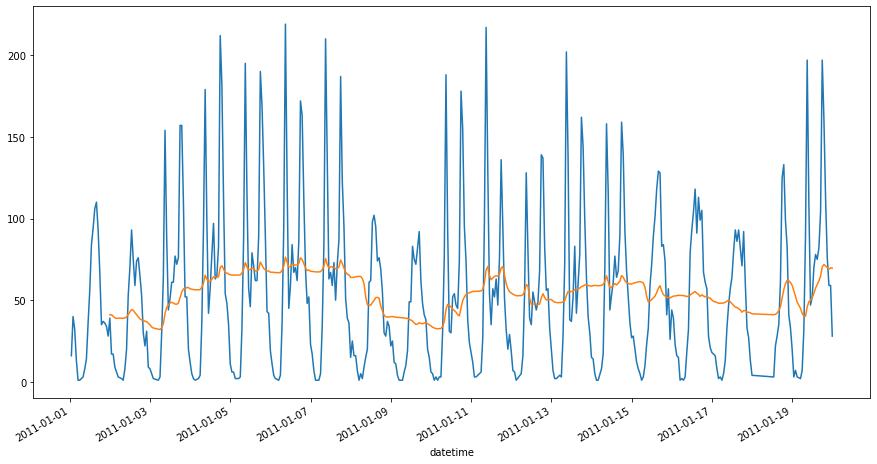

In [45]:
df['count']['2011-01'].plot(figsize=(15, 8))
df['count']['2011-01'].rolling(24).mean().plot(figsize=(15, 8))

In [46]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 01:00:00+01:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 02:00:00+01:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 03:00:00+01:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 04:00:00+01:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 05:00:00+01:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [47]:
####the shift function is use to shift the vaues correspouding to an index
##the below example will shift the values with index one below, and the index 1 timestamp will
###not av any values
df.shift(1).head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01 02:00:00+01:00,1.0,0.0,0.0,1.0,9.84,14.395,81.0,0.0,3.0,13.0,16.0
2011-01-01 03:00:00+01:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2011-01-01 04:00:00+01:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0,5.0,27.0,32.0
2011-01-01 05:00:00+01:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0,3.0,10.0,13.0


In [48]:
####the example will loose the values corresponding to the last index values
df.shift(-1).head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 01:00:00+01:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
2011-01-01 02:00:00+01:00,1.0,0.0,0.0,1.0,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
2011-01-01 03:00:00+01:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
2011-01-01 04:00:00+01:00,1.0,0.0,0.0,1.0,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
2011-01-01 05:00:00+01:00,1.0,0.0,0.0,2.0,9.84,12.880,75.0,6.0032,0.0,1.0,1.0


In [120]:
df.shift(-1).tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 20:00:00+01:00,4.0,0.0,1.0,1.0,14.76,17.425,57.0,15.0013,10.0,231.0,241.0
2012-12-19 21:00:00+01:00,4.0,0.0,1.0,1.0,13.94,15.910,61.0,15.0013,4.0,164.0,168.0
2012-12-19 22:00:00+01:00,4.0,0.0,1.0,1.0,13.94,17.425,61.0,6.0032,12.0,117.0,129.0
2012-12-19 23:00:00+01:00,4.0,0.0,1.0,1.0,13.12,16.665,66.0,8.9981,4.0,84.0,88.0
2012-12-20 00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
